## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [ ]:
# data in "https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [35]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [31]:
### 1.
# - Create a crosstab between the product `category` and the `isBestSeller` status.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [32]:
crosstab['proportions'] = crosstab[True] / crosstab.sum(axis=1) # axis = 1 specifies that the sum should be calculated along the columns, effectively summing the values in each row

In [36]:
crosstab.sort_values(by='proportions', ascending=False)

# Are there categories where being a best-seller is more prevalent? Yes, Grocery, Smart Home Security and lighting, and Health and personal care. The
# porportions in those categories is higher than in others, with around 5.8-5.7% of best-sellers.

isBestSeller,False,True,proportions
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [58]:
### 2.
# - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

# we build crosstab again in order to have only columns needed for the test (without proportions)
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [40]:
print(f"P-value: {chi2_p_value:.800f}")

# we print chi-square p-value with 800 decimals and still seems like it tends to zero. We can assume that 'isBestSeller' distribution is dependent on
# product category.

P-value: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [48]:
# - Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

# 0 indicates no association between the variables, and 1 indicates a perfect association. The value we obtain 0.12228... indicates a weak association
# between the two variables.

0.1222829439760564

<Figure size 1200x800 with 0 Axes>

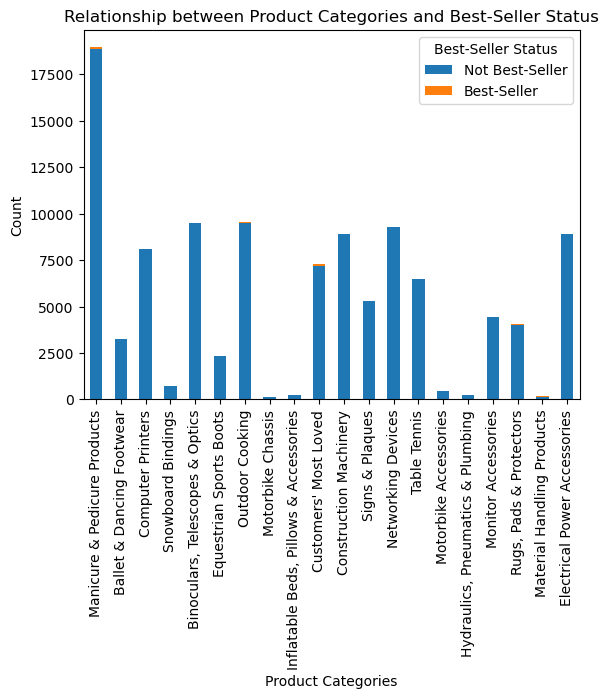

In [59]:
# - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

import matplotlib.pyplot as plt

# Assuming 'crosstab_result' contains the contingency table of product categories and best-seller status
# 'crosstab_result' should be in the format generated by pd.crosstab()
# df for plot, we create a sample of 20 categories, so we can see results in a nice way:
crosstab_result = crosstab_result.sample(20)
# Plotting
plt.figure(figsize=(12, 8))
crosstab_result.plot(kind='bar', stacked=True)
plt.title('Relationship between Product Categories and Best-Seller Status')
plt.xlabel('Product Categories')
plt.ylabel('Count')
plt.legend(title='Best-Seller Status', labels=['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=90)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [95]:
# Preliminary step: filter out outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove the outliers
df_filtered = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

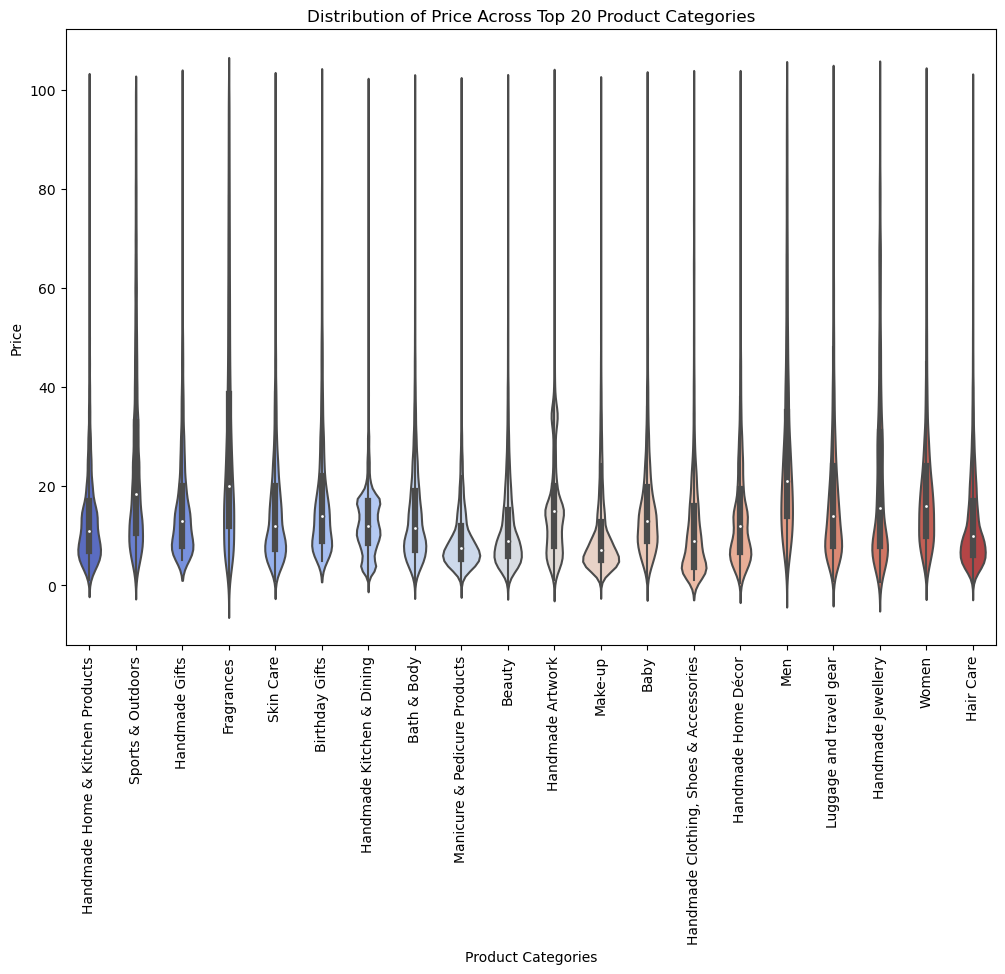

In [97]:
# - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count 
# for better visualization.

# Filter out the top 20 categories based on count
top_categories = df_filtered['category'].value_counts().nlargest(20).index
df_plot = df_filtered[df_filtered['category'].isin(top_categories)]

# Plotting
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_plot, x='category', y='price', palette="coolwarm")
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [77]:
# - Which product category tends to have the highest median price? Don't filter here by top categories.
# If i don't filter here by top categories we cannot analyse the plot properly due to the amount of categories in the x axis.

<Axes: xlabel='category', ylabel='price'>

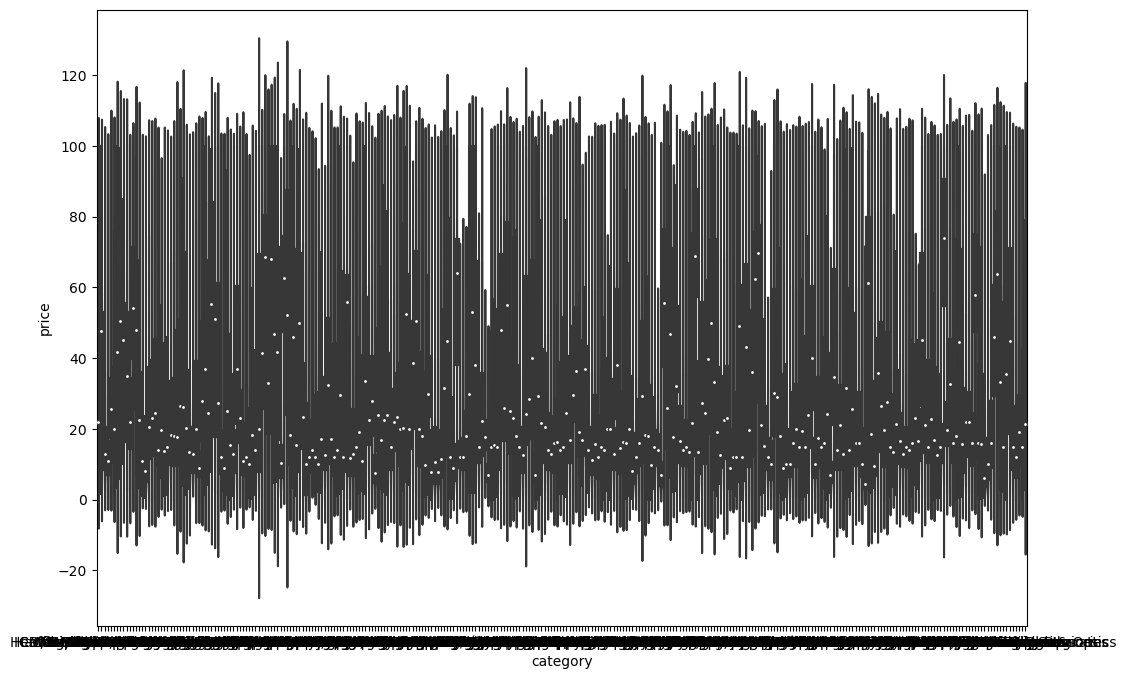

In [98]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_filtered, x='category', y='price', palette="coolwarm")

In [80]:
# here the category with higher median price:
df_filtered.groupby('category')['price'].median().idxmax()

'Sports & Outdoors'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

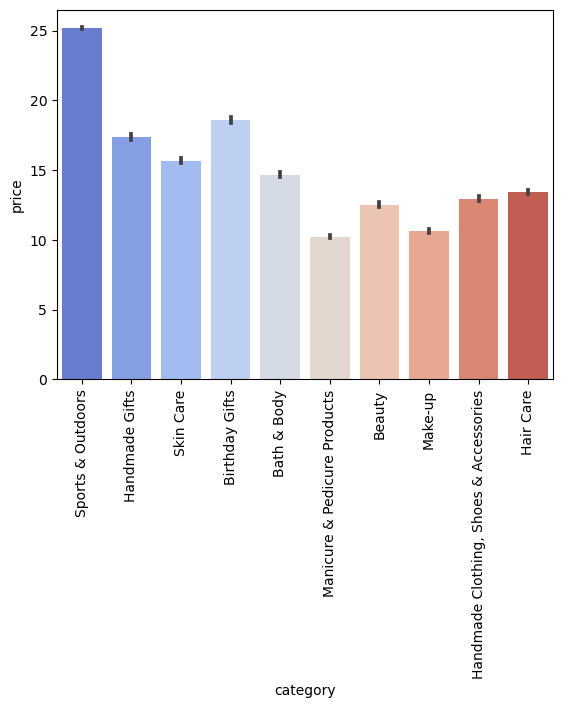

In [99]:
# - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

top_categories = df_filtered['category'].value_counts().nlargest(10).index
df_plot = df_filtered[df_filtered['category'].isin(top_categories)]

sns.barplot(data=df_plot, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)

In [103]:
# - Which product category commands the highest average price? Don't filter here by top categories.
# By observing the plot is 'Sports and Outdoors'<. Let's check that by coding:
df_plot.groupby('category')['price'].mean().idxmax()

'Sports & Outdoors'

In [102]:
# Let's check it without filtering by top categories, but by coding, since by plotting is not possible:
df_filtered.groupby('category')['price'].mean().idxmax()

# The product cateogory with the highest average price is 'Motherboards'.

'Motherboards'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

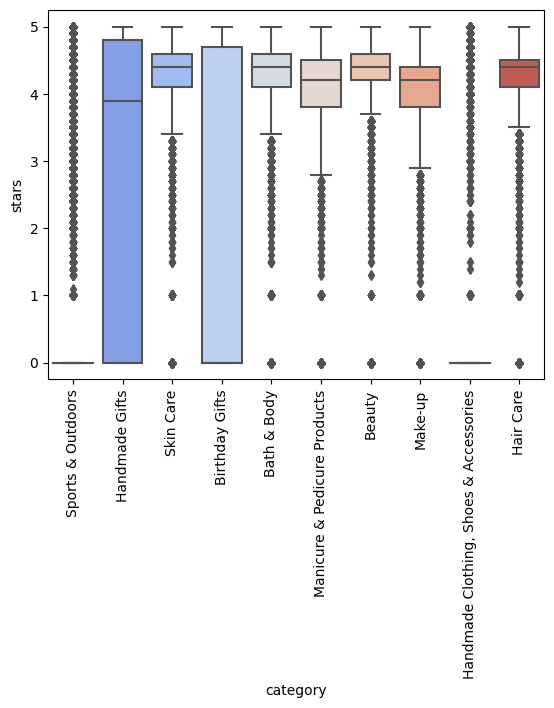

In [106]:
# - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on 
# count for better visualization.
top_categories = df_filtered['category'].value_counts().nlargest(10).index
df_plot = df_filtered[df_filtered['category'].isin(top_categories)]

sns.boxplot(data = df_plot, x = 'category', y = 'stars', palette= 'coolwarm')
plt.xticks(rotation = 90)


In [107]:
# - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# By observing the plot seems like it is 'Bath & Body'. Let's check it:

df_plot.groupby('category')['stars'].median().idxmax()

'Bath & Body'

In [108]:
# Let's know do it without filtering by top categories.
df_filtered.groupby('category')['stars'].median().idxmax()

# Higher ranking is obtained in the category 'Computer Memory'.

'Computer Memory'

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [111]:
# - Calculate the correlation coefficient between `price` and `stars`.

pearson_corr = df['price'].corr(df['stars']) # default value is pearson
spearman_corr = df['price'].corr(df['stars'], method = 'spearman')

print(f'The pearson correlation between price and rating is {pearson_corr}')
print(f'The spearman correlation between price and rating is {spearman_corr}')

# - Is there a significant correlation between product price and its rating?

# The pearson correlation indicates a weak negative correlation between price and rating. The spearman correlation suggest also a weak negative correlation
# between these two variables. The correlation is not strogn enough to confirm that higher the price lower the rating. The slighly lower value for the
# Spearman coefficient may suggests that there are soem non linear aspects in that negative correlation, or the presence of outliers affecting the 
# Pearson correlation; however, both coefficient are very similar to conclude that.

The pearson correlation between price and rating is -0.1249067326214861
The spearman correlation between price and rating is -0.1331642546243379


In [119]:
# Now, same analysis but filtering out outliers:

pearson_corr = df_filtered['price'].corr(df_filtered['stars']) # default value is pearson
spearman_corr = df_filtered['price'].corr(df_filtered['stars'], method = 'spearman')

print(f'The pearson correlation between price and rating is {pearson_corr}')
print(f'The spearman correlation between price and rating is {spearman_corr}')

# When filtering out outliers, the negative correlation seen between price and rating is even lower, with values close to zero, in both pearson and
# spearman correlation coefficients.

The pearson correlation between price and rating is -0.0776729987818137
The spearman correlation between price and rating is -0.06679697280768314


<Axes: xlabel='price', ylabel='stars'>

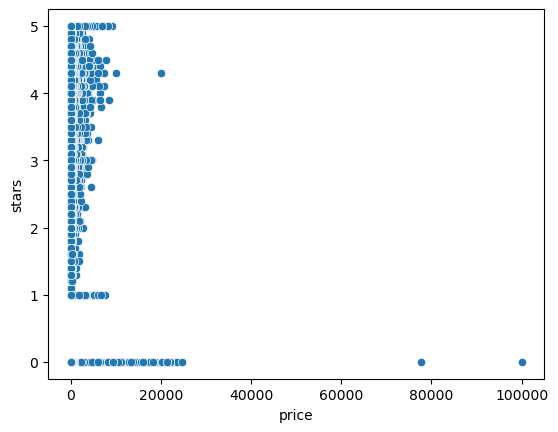

In [118]:
# - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

sns.scatterplot(data=df, x='price', y='stars')

# As observed in the correlation coefficients, there is no correlation between the two variables. Possibly, the weak negative correlation seen in the
# coefficients is due to the huge number of rating with zero stars in products with very high prices.

<Axes: xlabel='price', ylabel='stars'>

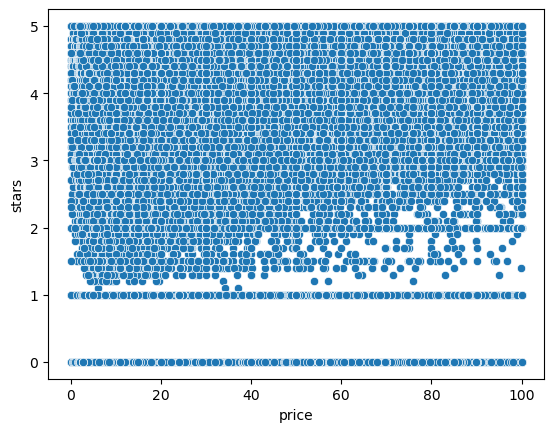

In [120]:
# Scatter plot without outliers:
sns.scatterplot(data = df_filtered, x = 'price', y = 'stars')

# As observed in the correlation coefficients, there is no correlation between the two variables. There is a gap between 0 and 1 star. It might happens
# that products with zero stars have not been evaluated, since there is no intermediate rating between zero and one.

In [124]:
# Let's remove those products with zero stars and observe correlations:
df_no_zeros = df_filtered[df_filtered['stars'] != 0.0]

pearson_corr = df_no_zeros['price'].corr(df_no_zeros['stars']) # default value is pearson
spearman_corr = df_no_zeros['price'].corr(df_no_zeros['stars'], method = 'spearman')

print(f'The pearson correlation between price and rating is {pearson_corr}')
print(f'The spearman correlation between price and rating is {spearman_corr}')

# correlation coefficients suggest that even filtering out products rated with zero stars there is no correlation between price and rating.

The pearson correlation between price and rating is 0.006744508067158032
The spearman correlation between price and rating is 0.024659617205380444


<Axes: xlabel='price', ylabel='stars'>

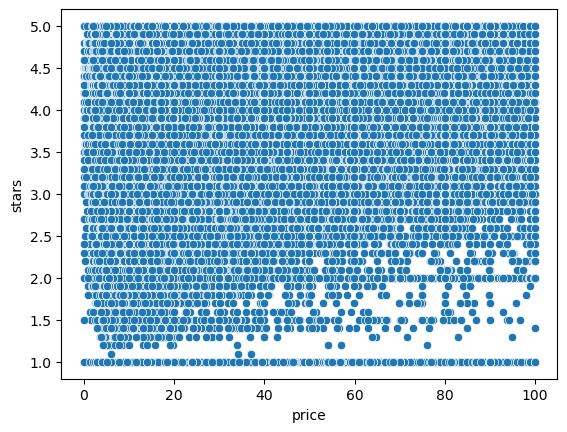

In [123]:
# We can also observe that when analyzing the scatter plot. However, we notice a very little positive trend, which is in agreement with the
# weak positive spearman coefficient above.
sns.scatterplot(data = df_no_zeros, x = 'price', y = 'stars')


Text(0.5, 1.0, 'Correlation Heatmap for Selected Numerical Variables')

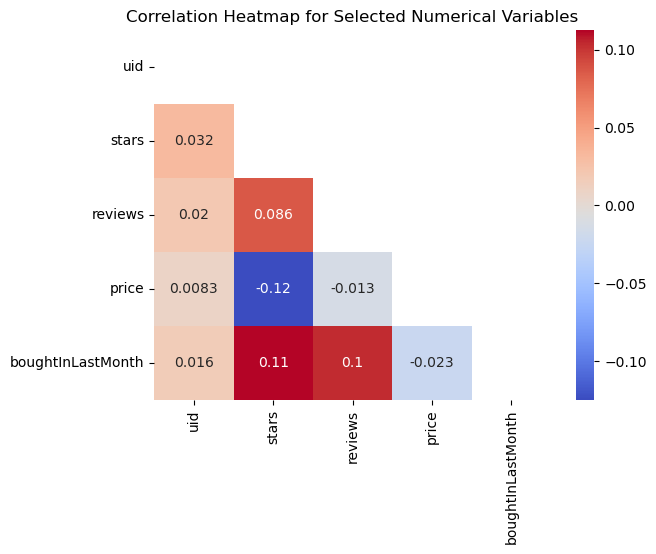

In [130]:
# - Use a correlation heatmap to visualize correlations between all numerical variables.

df_numerical = df.select_dtypes("number")

correlation_matrix = df_numerical.corr()

matrix = np.triu(correlation_matrix) #to make half heatmap

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask = matrix)
plt.title("Correlation Heatmap for Selected Numerical Variables")

Text(0.5, 1.0, 'Correlation Heatmap for Selected Numerical Variables')

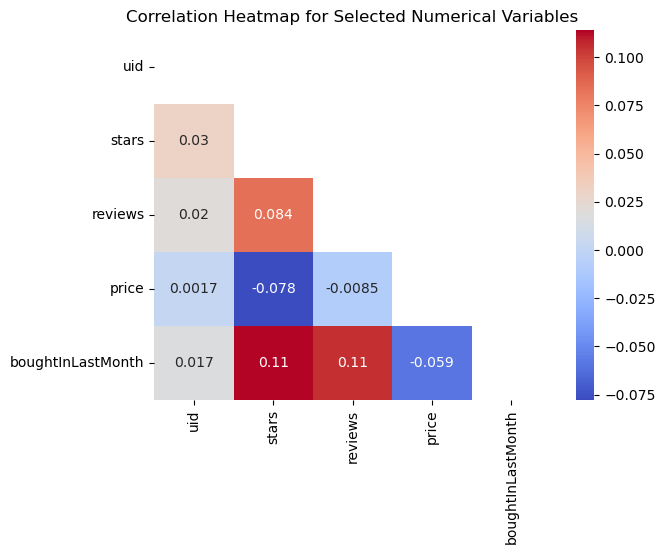

In [132]:
# We do not observe strong correlation between the relevants (stars, reviews and price) numerical variables.

# Let's now analyze data without outliers:
df_numerical = df_filtered.select_dtypes("number")

correlation_matrix = df_numerical.corr()

matrix = np.triu(correlation_matrix) #to make half heatmap

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask = matrix)
plt.title("Correlation Heatmap for Selected Numerical Variables")

# Similar results with no strong correlation between the numrical variables.

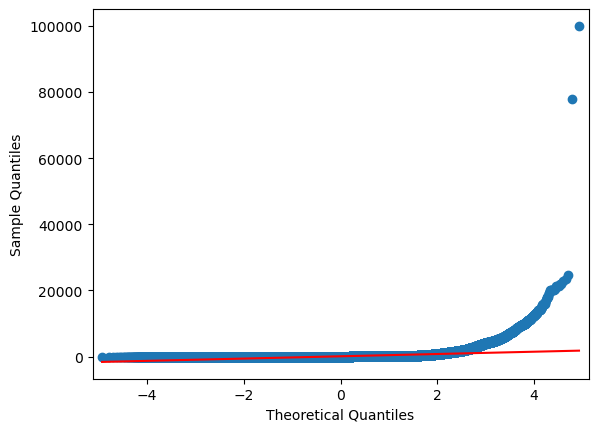

In [133]:
# - Examine if product prices typically follow a normal distribution using a QQ plot.

import statsmodels.api as sm

sm.qqplot(df['price'], line='s');

# data prices does not follow a normal distribution. It seems more like data follows an exponential distribution.

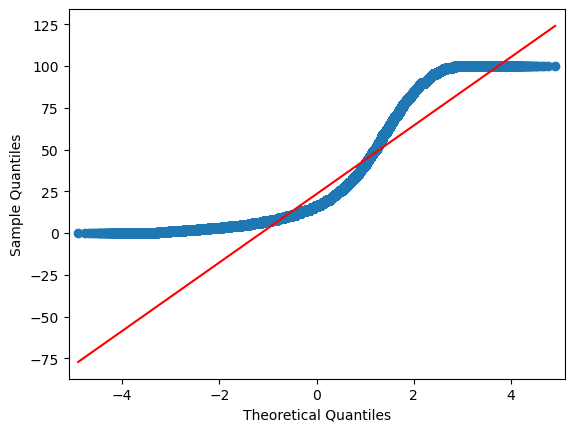

In [134]:
# Let's now analyze data without outliers:
sm.qqplot(df_filtered['price'], line='s');

# we can observe better how prices follows indeed an exponential growth.